# Satellite orbit propagation

This tutorial shows how to use a simple orbit propagation with 2 cases : SGP4 propagator (slow) and circle propagator (quick). The circle propagator makes the satellite move on a perfect circle at a constant angular rate.

## Preparation
We import the necessary libraries

In [1]:
from datetime import datetime, timezone
import os

import numpy as np

from blocksim.Simulation import Simulation
from blocksim.satellite.Satellite import (
    SGP4Satellite,
    CircleSatellite,
    createSatellites,
)
from blocksim.satellite.Trajectory import Trajectory

[INFO] - Registered blocksim_logger_rest.PsqlLogger
[INFO] - Registered blocksim.loggers.CSVLogger
[INFO] - Registered blocksim.loggers.PickleLogger
[INFO] - Registered blocksim.loggers.XlsLogger


## Satellite creation
We create the satellites from a TLE file. The 2 propagators are used, and we modify the name of the read satellites to prefix it with the type of propagator used. Otherwise, the simulation will reject duplicate names.

In [2]:
t0 = datetime(
    year=2022, month=2, day=3, hour=12, minute=0, second=0, tzinfo=timezone.utc
)
sats_sgp4 = createSatellites(
    tle_file=os.getcwd() + "/../tests/TLE/gs1_gs2.tle",
    tsync=t0,
    prop=SGP4Satellite,
    name_prefix="sgp4",
)
sats_circle = createSatellites(
    tle_file=os.getcwd() + "/../tests/TLE/gs1_gs2.tle",
    tsync=t0,
    prop=CircleSatellite,
    name_prefix="circle",
)

## Simulation
We run the simulation

In [3]:
sim = Simulation(*(sats_sgp4 + sats_circle))
ns = 200
tps = np.linspace(0, 5 * 60, ns)
sim.simulate(tps, progress_bar=False)

## Plotting
We plot the trajetcories : in thick red SGP4 and in thin blue the circle propagator

In [4]:
log = sim.getLogger()

In [5]:
from blocksim.graphics.BFigure import FigureFactory
from blocksim.graphics.GraphicSpec import AxeProjection

fig = FigureFactory.create()
gs = fig.add_gridspec(1, 1)
axe = fig.add_baxe(title="", spec=gs[0, 0], projection=AxeProjection.PLATECARREE)

In [6]:
for s in sats_sgp4:
    traj = s.getTrajectoryFromLogger(log, color="red")
    axe.plot(traj, linewidth=4)

In [7]:
for s in sats_circle:
    traj = s.getTrajectoryFromLogger(log, color="blue")
    axe.plot(traj)

We can see a good correlation between the 2 types of propagators.

/Users/ydethe/.venv/sim/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:531: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/Users/ydethe/.venv/sim/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:538: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/Users/ydethe/.venv/sim/lib/python3.8/site-packages/numpy/lib/function_base.py:5392: ShapelyDeprecationWarning: The array interface is deprecated and will no

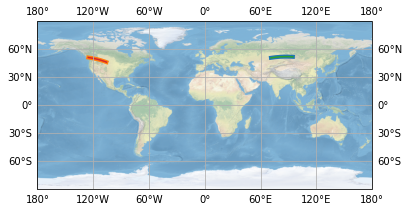

In [8]:
mfig = fig.render()